In [0]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1M8ZhsATiJGFX1iLg13iWZB_3CC_WExJb"})   # replace the id with id of file you want to access
downloaded.GetContentFile('auto-mpg.csv')        # replace the file name with your file

In [0]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#import data file
cars=pd.read_csv('auto-mpg.csv')

In [0]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [0]:
#show data file columns
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [0]:
cars['car name'] = cars['car name'].apply(lambda x:x.split(' ')[0])  # Save only the brand name in car name column

In [0]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


In [0]:
cars['car name'].unique()  # Find unique car brand names

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [0]:
#correct errors in data entry
cars['car name'].replace('maxda','mazda', inplace=True)
cars['car name'].replace('toyouta','toyota', inplace=True)
cars['car name'].replace('vokswagen','volkswagen', inplace=True)
cars['car name'].replace('vw','volkswagen', inplace=True)
cars['car name'].replace('chevy','chevroelt', inplace=True)

In [0]:
cars['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevroelt', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'honda',
       'subaru', 'capri', 'mercedes-benz', 'cadillac', 'mercedes',
       'triumph', 'nissan'], dtype=object)

In [0]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,volkswagen
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


In [0]:
#Convert text categories of brand names to codes
cars['car name']= cars['car name'].astype('category').cat.codes

In [0]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,7
1,15.0,8,350.0,165,3693,11.5,70,1,3
2,18.0,8,318.0,150,3436,11.0,70,1,23
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,12
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,12
394,44.0,4,97.0,52,2130,24.6,82,2,30
395,32.0,4,135.0,84,2295,11.6,82,1,10
396,28.0,4,120.0,79,2625,18.6,82,1,12


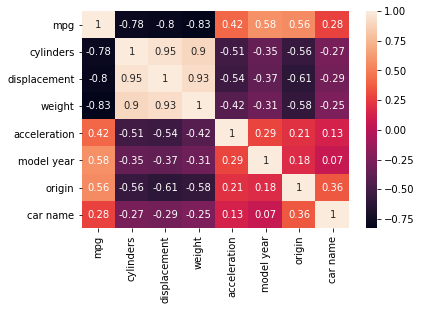

In [0]:
import seaborn as sns
correlation_matrix=cars.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
#From the correlation matrix identify strongest correlators to mpg

Text(0, 0.5, 'mpg')

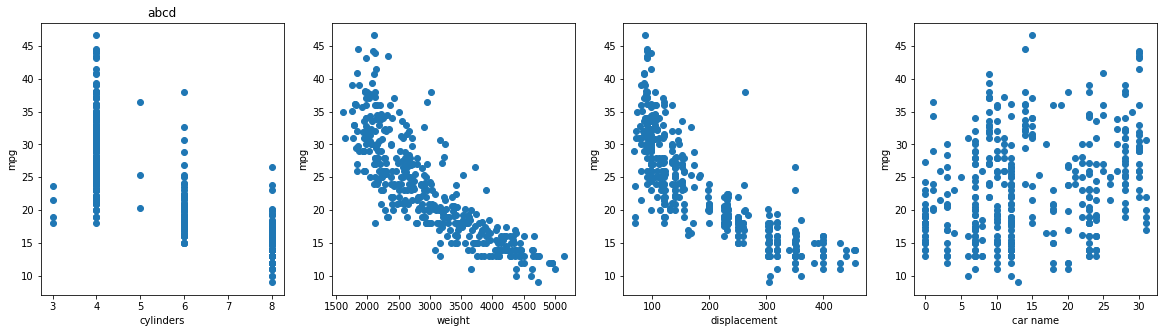

In [0]:
#Strong correlation of mpg with cylinder, displacement and weight very small correlation with brand name
import matplotlib.pyplot as plt
plt.figure(figsize = [20,5])
plt.subplot(1,4,1)
plt.scatter(cars['cylinders'],cars['mpg'])
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title('abcd')


plt.subplot(1,4,2)
plt.scatter(cars['weight'],cars['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')

plt.subplot(1,4,3)
plt.scatter(cars['displacement'],cars['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg')

plt.subplot(1,4,4)
plt.scatter(cars['car name'],cars['mpg'])
plt.xlabel('car name')
plt.ylabel('mpg')


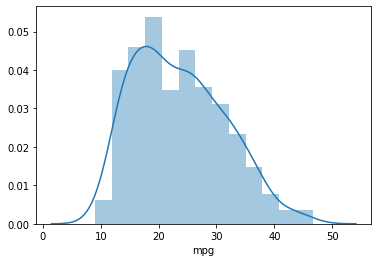

In [0]:
#Distribution of mpg
sns.distplot(cars['mpg'])

In [0]:
#Create the training set
#Shuffle and copy 200 rows. Extract the mpg row as the target (train_sety)
from sklearn.utils import shuffle
cars = shuffle(cars)
train_Set = cars[:200]
train_sety = train_Set['mpg'];
train_setx = train_Set.drop(columns = ['mpg'])

In [0]:
train_setx

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
204,4,85.0,70,1990,17.0,76,3,9
270,4,134.0,95,2515,14.8,78,3,28
52,4,88.0,76,2065,14.5,71,2,11
96,8,360.0,175,3821,11.0,73,1,0
77,4,121.0,76,2511,18.0,72,2,30
...,...,...,...,...,...,...,...,...
100,6,250.0,88,3021,16.5,73,1,12
177,4,115.0,95,2694,15.0,75,2,1
238,4,98.0,83,2075,15.9,77,1,10
360,6,145.0,76,3160,19.6,81,2,31


In [0]:
#Create the test set
#copy alls rows after 200. Extract the mpg row as the target (test_sety)
test_Set = cars[200:]
test_sety = test_Set['mpg'];
test_setx = test_Set.drop(columns = ['mpg'])

In [0]:
#random initialization of weights 
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);

In [0]:
#normalization
import numpy as np
X1 = train_setx['weight'];
X2 = np.square(train_setx['weight'])

M1= np.mean(X1);
S1 = np.std(X1);
X1 = (X1 - M1)/S1;

M2= np.mean(X2);
S2 = np.std(X2);
X2 = (X2 - M2)/S2;

Y = train_sety
L = len(X1)
alpha = 0.5;

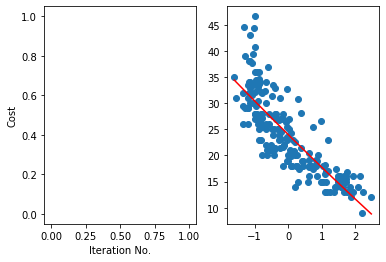

Error =  692.5912911227931 theta0 =  24.0885 theta1 =  -6.944681936599756 theta2 =  0.6677167384815095 



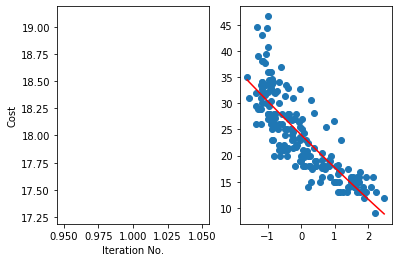

Error =  18.187871102783994 theta0 =  24.0885 theta1 =  -7.083840988595233 theta2 =  0.8058745973239213 



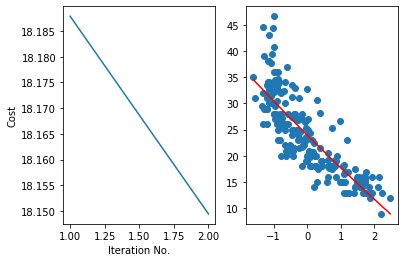

Error =  18.14941826707179 theta0 =  24.0885 theta1 =  -7.221004857464793 theta2 =  0.9420516275768713 



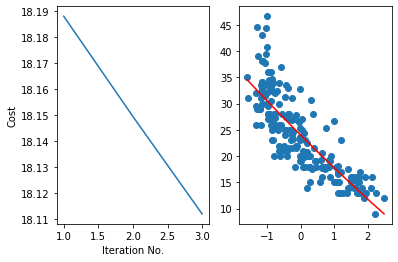

Error =  18.112060156580014 theta0 =  24.0885 theta1 =  -7.356202149006255 theta2 =  1.0762762292310193 



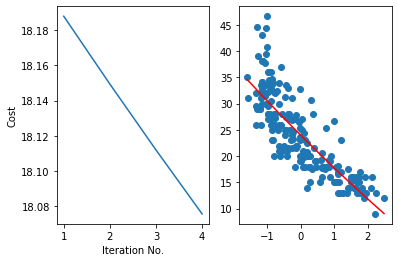

Error =  18.07576560525065 theta0 =  24.0885 theta1 =  -7.489461058883822 theta2 =  1.208576395094157 



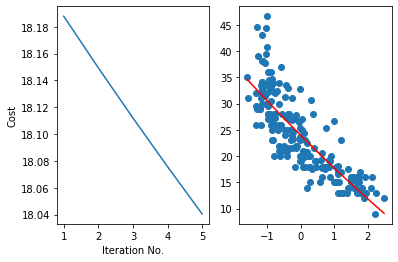

Error =  18.04050433430148 theta0 =  24.0885 theta1 =  -7.620809378508342 theta2 =  1.3389797166291617 



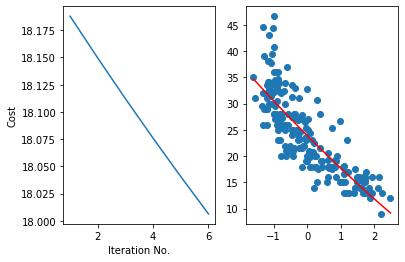

Error =  18.006246926965932 theta0 =  24.0885 theta1 =  -7.7502745008332665 theta2 =  1.4675133897082504 



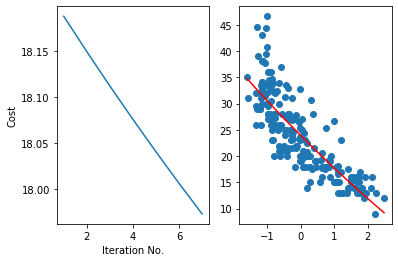

Error =  17.972964803952124 theta0 =  24.0885 theta1 =  -7.877883426067499 theta2 =  1.594204220284734 



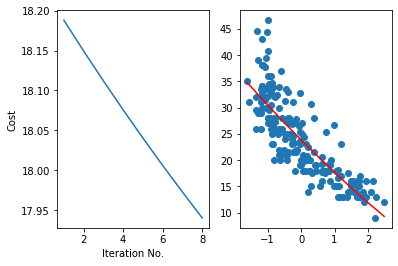

Error =  17.940630199600527 theta0 =  24.0885 theta1 =  -8.003662767306349 theta2 =  1.719078629983453 



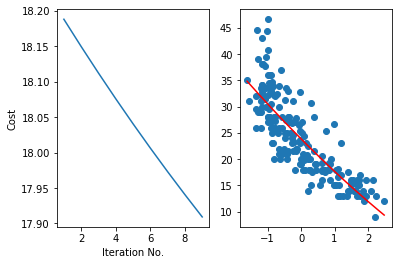

Error =  17.90921613872045 theta0 =  24.0885 theta1 =  -8.127638756081739 theta2 =  1.8421626616110587 



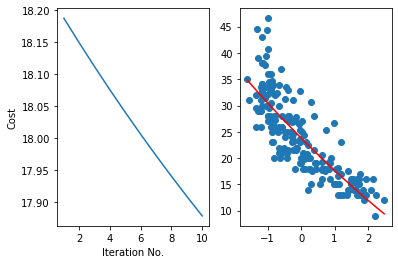

Error =  17.878696414085905 theta0 =  24.0885 theta1 =  -8.24983724783285 theta2 =  1.9634819845872926 



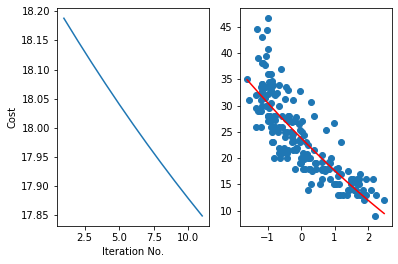

Error =  17.849045564572247 theta0 =  24.0885 theta1 =  -8.370283727298322 theta2 =  2.083061900298395 



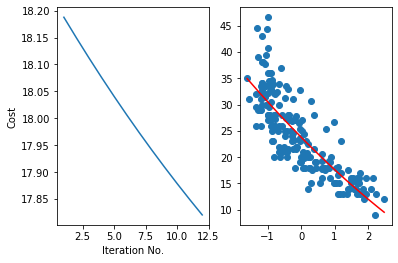

Error =  17.82023885391515 theta0 =  24.0885 theta1 =  -8.489003313831141 theta2 =  2.2009273473737596 



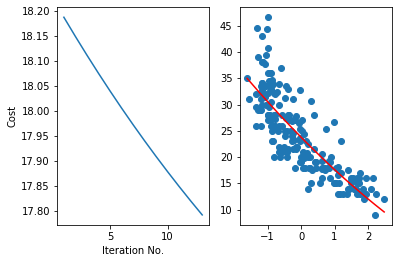

Error =  17.792252250074352 theta0 =  24.0885 theta1 =  -8.60602076663734 theta2 =  2.3171029068869338 



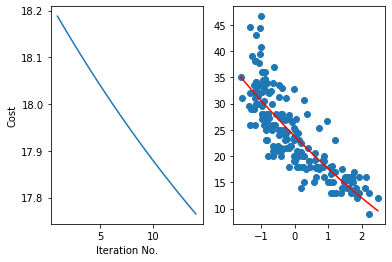

Error =  17.7650624051849 theta0 =  24.0885 theta1 =  -8.721360489939572 theta2 =  2.431612807482051 



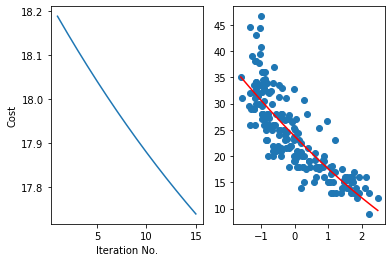

Error =  17.73864663607916 theta0 =  24.0885 theta1 =  -8.835046538066669 theta2 =  2.5444809304267633 



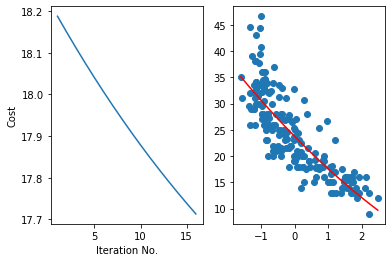

Error =  17.71298290536334 theta0 =  24.0885 theta1 =  -8.947102620470208 theta2 =  2.655730814592725 



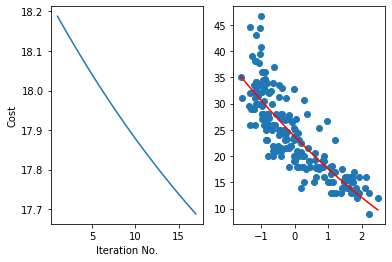

Error =  17.688049803032772 theta0 =  24.0885 theta1 =  -9.057552106669174 theta2 =  2.765385661364675 



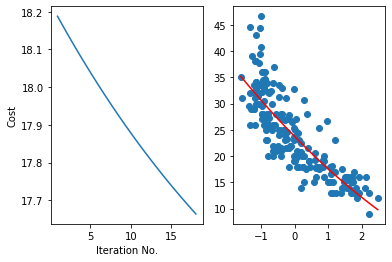

Error =  17.663826528610574 theta0 =  24.0885 theta1 =  -9.166418031123717 theta2 =  2.873468339479127 



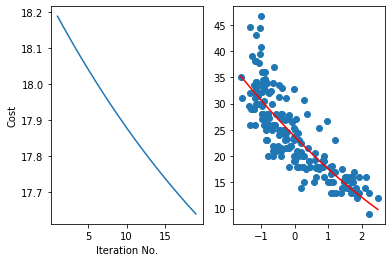

Error =  17.64029287379484 theta0 =  24.0885 theta1 =  -9.273723098039031 theta2 =  2.980001389793694 



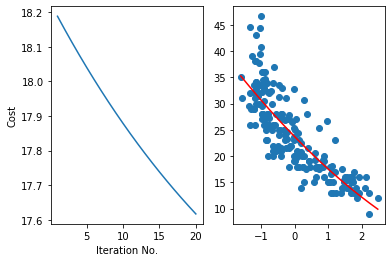

Error =  17.617429205599816 theta0 =  24.0885 theta1 =  -9.379489686100367 theta2 =  3.0850070299880272 



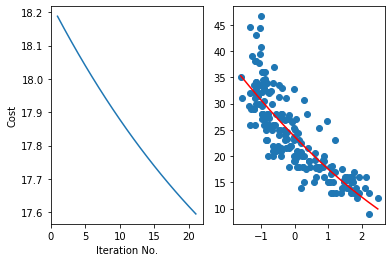

Error =  17.595216449977062 theta0 =  24.0885 theta1 =  -9.483739853140147 theta2 =  3.188507159197358 



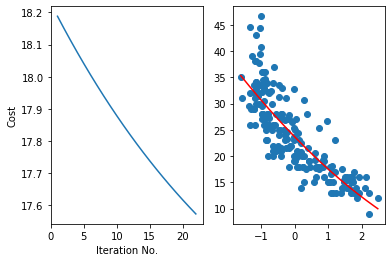

Error =  17.57363607590289 theta0 =  24.0885 theta1 =  -9.586495340738173 theta2 =  3.2905233625796058 



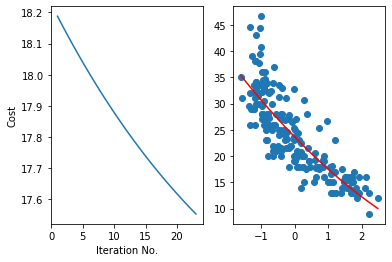

Error =  17.552670079918855 theta0 =  24.0885 theta1 =  -9.687777578755872 theta2 =  3.3910769158170027 



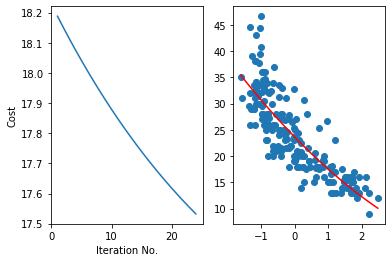

Error =  17.53230097111231 theta0 =  24.0885 theta1 =  -9.787607689805544 theta2 =  3.490188789553187 



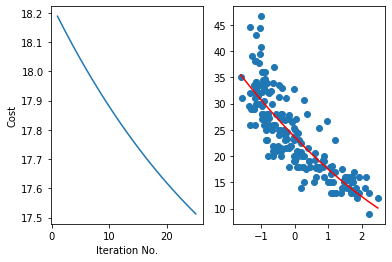

Error =  17.512511756524624 theta0 =  24.0885 theta1 =  -9.886006493655515 theta2 =  3.5878796537666657 



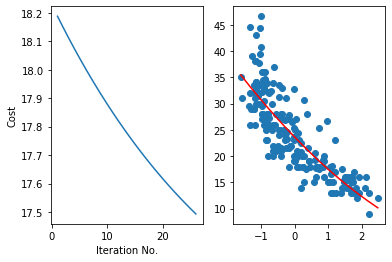

Error =  17.493285926974742 theta0 =  24.0885 theta1 =  -9.982994511572148 theta2 =  3.6841698820815805 



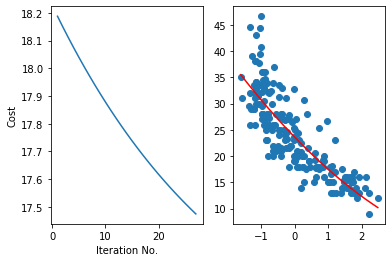

Error =  17.474607443286406 theta0 =  24.0885 theta1 =  -10.078591970599593 theta2 =  3.7790795560166717 



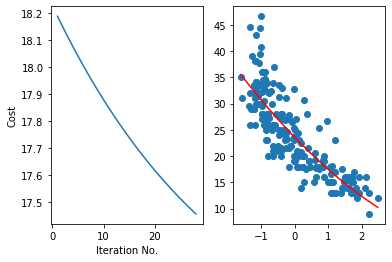

Error =  17.456460722907437 theta0 =  24.0885 theta1 =  -10.172818807778174 theta2 =  3.872628469173313 



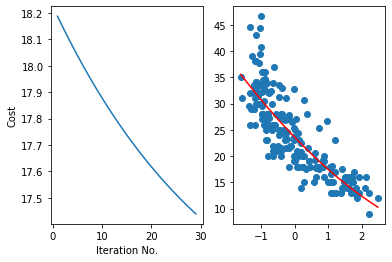

Error =  17.438830626909972 theta0 =  24.0885 theta1 =  -10.265694674302305 theta2 =  3.9648361313635134 



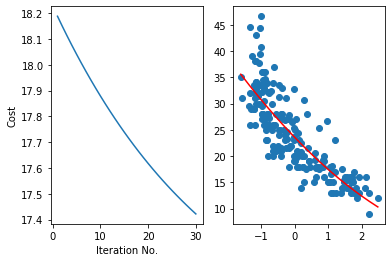

Error =  17.421702447360783 theta0 =  24.0885 theta1 =  -10.357238939618776 theta2 =  4.055721772678722 



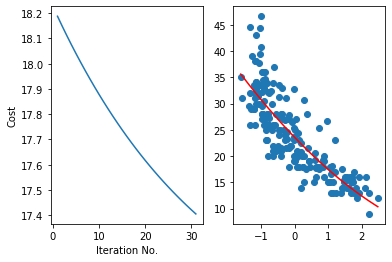

Error =  17.405061895051173 theta0 =  24.0885 theta1 =  -10.4474706954663 theta2 =  4.145304347500305 



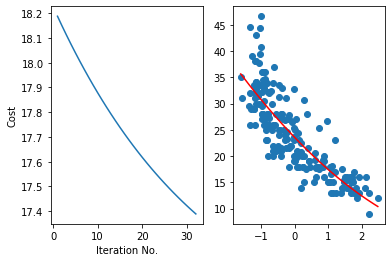

Error =  17.38889508757618 theta0 =  24.0885 theta1 =  -10.536408759857126 theta2 =  4.233602538452515 



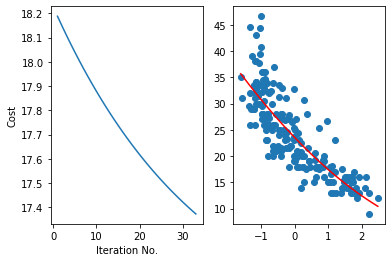

Error =  17.37318853775316 theta0 =  24.0885 theta1 =  -10.624071681001576 theta2 =  4.320634760298795 



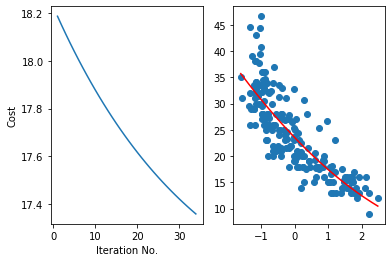

Error =  17.357929142370082 theta0 =  24.0885 theta1 =  -10.710477741176309 theta2 =  4.406419163782211 



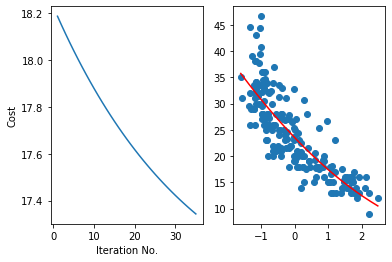

Error =  17.343104171254158 theta0 =  24.0885 theta1 =  -10.795644960537127 theta2 =  4.490973639410826 



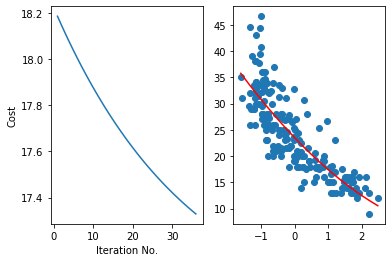

Error =  17.328701256651676 theta0 =  24.0885 theta1 =  -10.879591100877118 theta2 =  4.574315821188802 



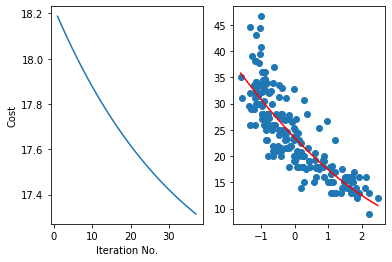

Error =  17.31470838291018 theta0 =  24.0885 theta1 =  -10.962333669330908 theta2 =  4.656463090294005 



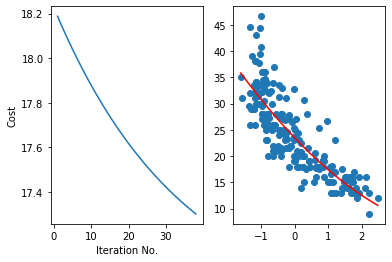

Error =  17.301113876454405 theta0 =  24.0885 theta1 =  -11.04388992202581 theta2 =  4.737432578702884 



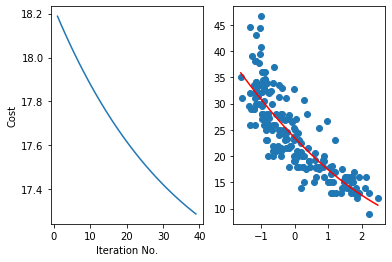

Error =  17.287906396047575 theta0 =  24.0885 theta1 =  -11.124276867680628 theta2 =  4.817241172763383 



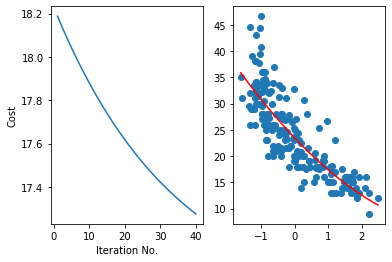

Error =  17.27507492332995 theta0 =  24.0885 theta1 =  -11.203511271152852 theta2 =  4.895905516716619 



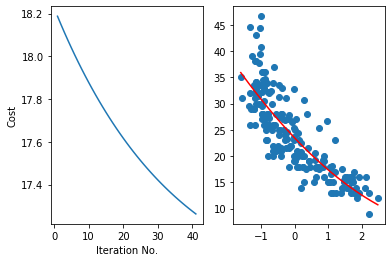

Error =  17.26260875362676 theta0 =  24.0885 theta1 =  -11.28160965693501 theta2 =  4.97344201616807 



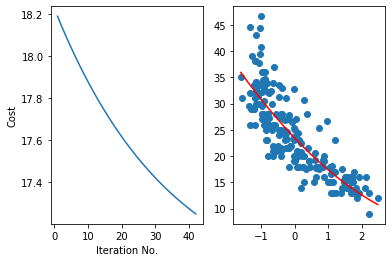

Error =  17.250497487017796 theta0 =  24.0885 theta1 =  -11.358588312600878 theta2 =  5.049866841508998 



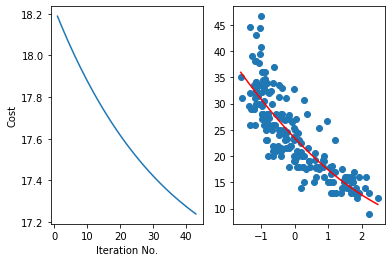

Error =  17.238731019661284 theta0 =  24.0885 theta1 =  -11.434463292202285 theta2 =  5.125195931288819 



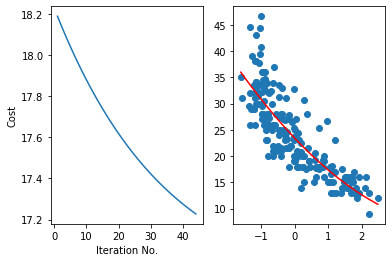

Error =  17.22729953536471 theta0 =  24.0885 theta1 =  -11.509250419617224 theta2 =  5.1994449955391175 



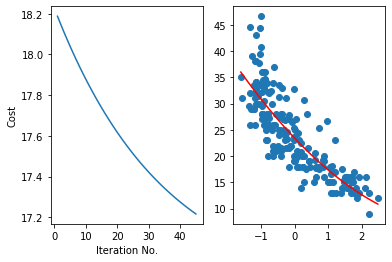

Error =  17.216193497395686 theta0 =  24.0885 theta1 =  -11.582965291849952 theta2 =  5.272629519050004 



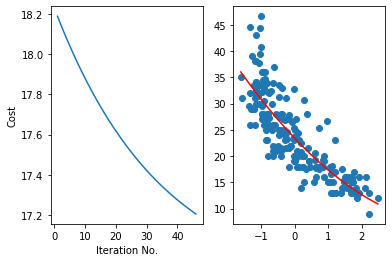

Error =  17.205403640525883 theta0 =  24.0885 theta1 =  -11.655623282283768 theta2 =  5.344764764599498 



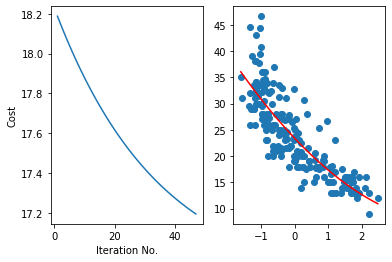

Error =  17.19492096330152 theta0 =  24.0885 theta1 =  -11.72723954388717 theta2 =  5.415865776136611 



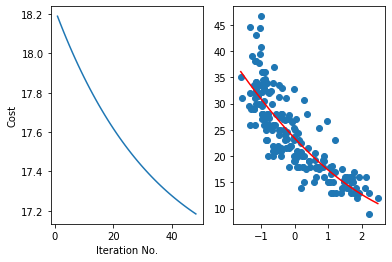

Error =  17.18473672053387 theta0 =  24.0885 theta1 =  -11.79782901237404 theta2 =  5.485947381918797 



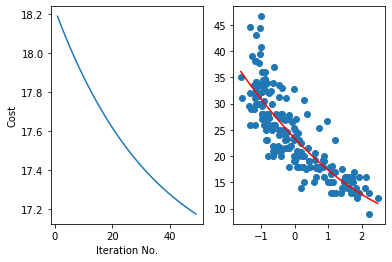

Error =  17.1748424160036 theta0 =  24.0885 theta1 =  -11.867406409318505 theta2 =  5.555024197604409 



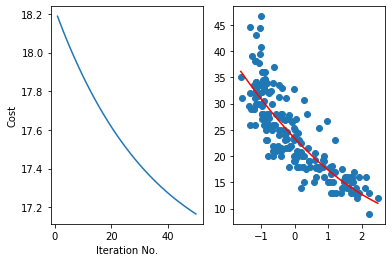

Error =  17.165229795372767 theta0 =  24.0885 theta1 =  -11.935986245225164 theta2 =  5.623110629300824 



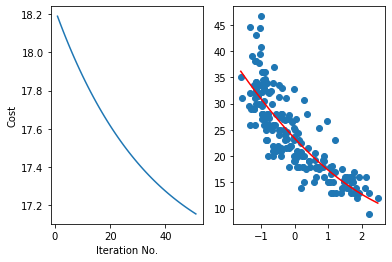

Error =  17.155890839298635 theta0 =  24.0885 theta1 =  -12.003582822555275 theta2 =  5.6902208765688735 



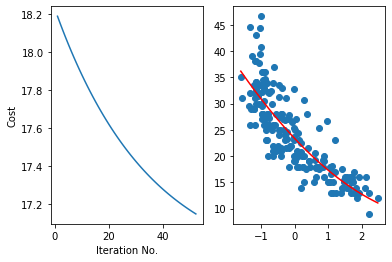

Error =  17.146817756743513 theta0 =  24.0885 theta1 =  -12.07021023870956 theta2 =  5.756368935384174 



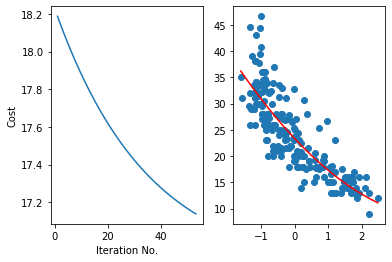

Error =  17.13800297847508 theta0 =  24.0885 theta1 =  -12.13588238896825 theta2 =  5.821568601056033 



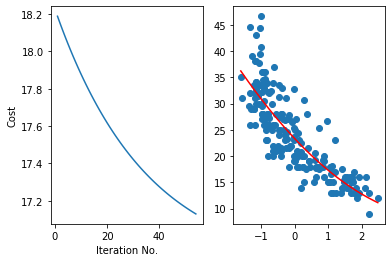

Error =  17.12943915075176 theta0 =  24.0885 theta1 =  -12.200612969388976 theta2 =  5.885833471104476 



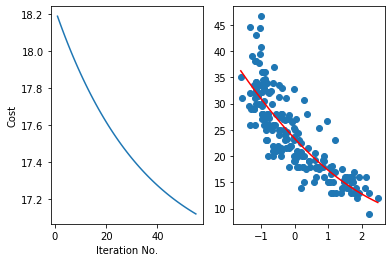

Error =  17.121119129187814 theta0 =  24.0885 theta1 =  -12.2644154796631 theta2 =  5.949176948096045 



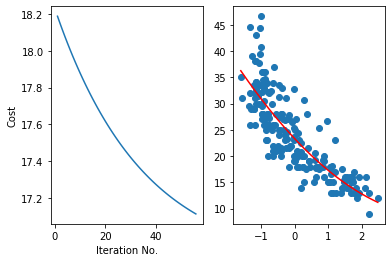

Error =  17.11303597279315 theta0 =  24.0885 theta1 =  -12.327303225931114 theta2 =  6.011612242438925 



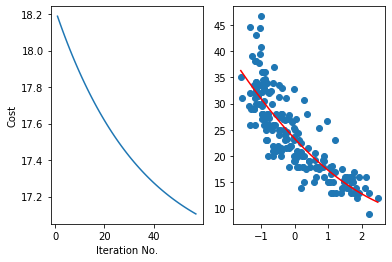

Error =  17.1051829381828 theta0 =  24.0885 theta1 =  -12.389289323557652 theta2 =  6.073152375138 



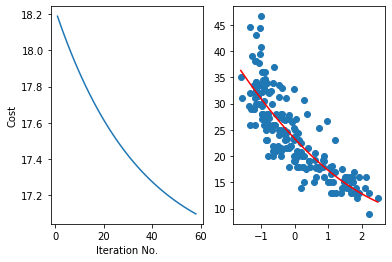

Error =  17.097553473951212 theta0 =  24.0885 theta1 =  -12.45038669986673 theta2 =  6.133810180510415 



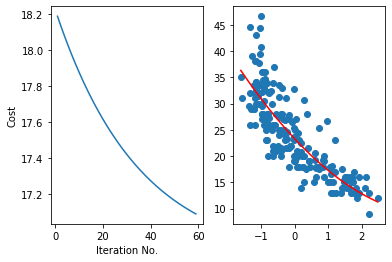

Error =  17.09014121520676 theta0 =  24.0885 theta1 =  -12.510608096837766 theta2 =  6.193598308862192 



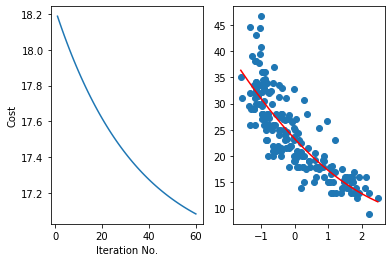

Error =  17.082939978261805 theta0 =  24.0885 theta1 =  -12.569966073762942 theta2 =  6.252529229126482 



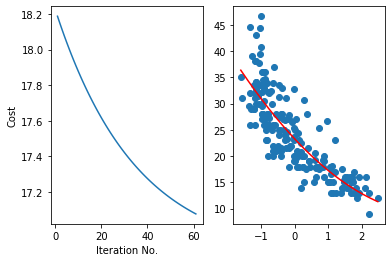

Error =  17.075943755473965 theta0 =  24.0885 theta1 =  -12.628473009866472 theta2 =  6.3106152314639825 



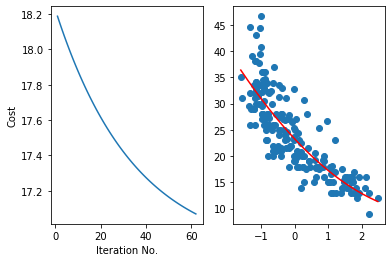

Error =  17.06914671023419 theta0 =  24.0885 theta1 =  -12.686141106886314 theta2 =  6.367868429826076 



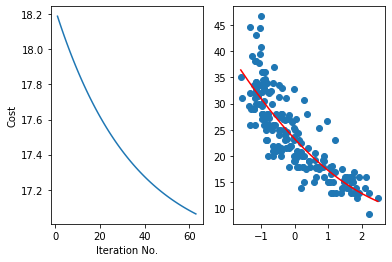

Error =  17.062543172097612 theta0 =  24.0885 theta1 =  -12.742982391618865 theta2 =  6.4243007644812185 



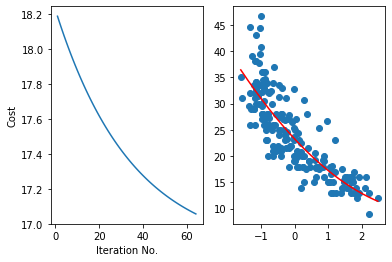

Error =  17.05612763205293 theta0 =  24.0885 theta1 =  -12.799008718427173 theta2 =  6.479924004505106 



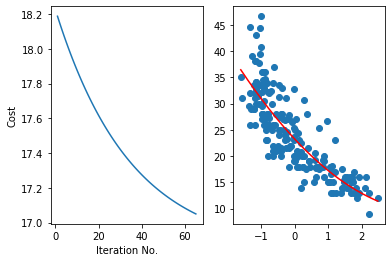

Error =  17.049894737926547 theta0 =  24.0885 theta1 =  -12.85423177171319 theta2 =  6.5347497502351395 



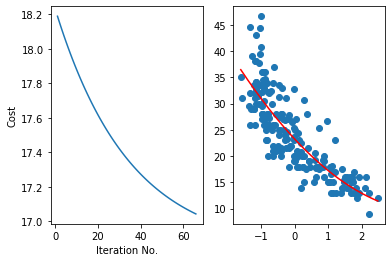

Error =  17.04383928991746 theta0 =  24.0885 theta1 =  -12.908663068354578 theta2 =  6.5887894356897 



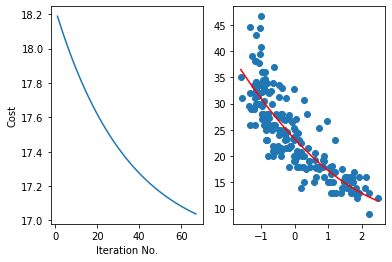

Error =  17.03795623625937 theta0 =  24.0885 theta1 =  -12.962313960106572 theta2 =  6.64205433095273 



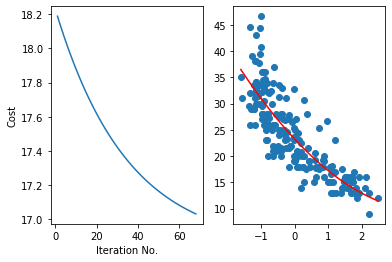

Error =  17.032240669006207 theta0 =  24.0885 theta1 =  -13.015195635969416 theta2 =  6.694555544524136 



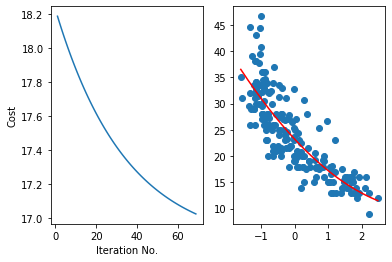

Error =  17.026687819937674 theta0 =  24.0885 theta1 =  -13.06731912452185 theta2 =  6.7463040256364915 



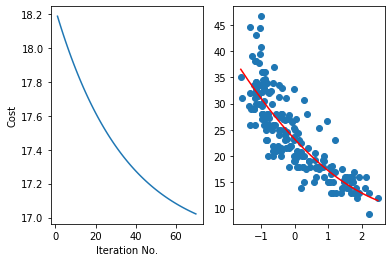

Error =  17.021293056581364 theta0 =  24.0885 theta1 =  -13.118695296221139 theta2 =  6.797310566538514 



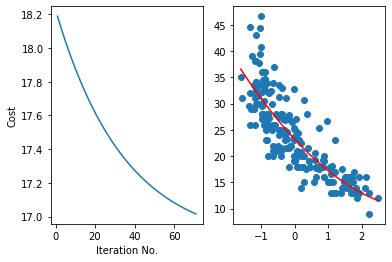

Error =  17.016051878348094 theta0 =  24.0885 theta1 =  -13.169334865670136 theta2 =  6.847585804745816 



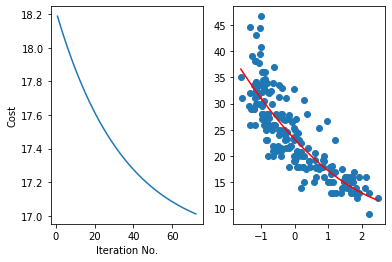

Error =  17.010959912777317 theta0 =  24.0885 theta1 =  -13.219248393851823 theta2 =  6.897140225259378 



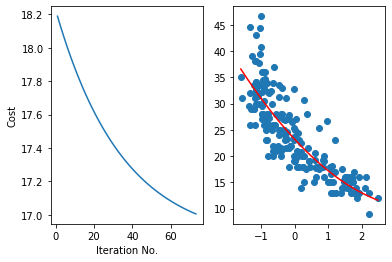

Error =  17.006012911889336 theta0 =  24.0885 theta1 =  -13.268446290331836 theta2 =  6.945984162752212 



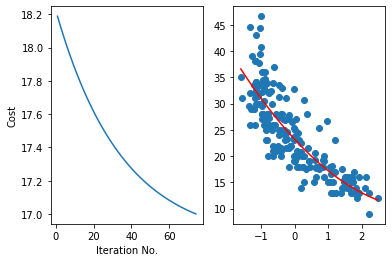

Error =  17.001206748641472 theta0 =  24.0885 theta1 =  -13.31693881542939 theta2 =  6.994127803724686 



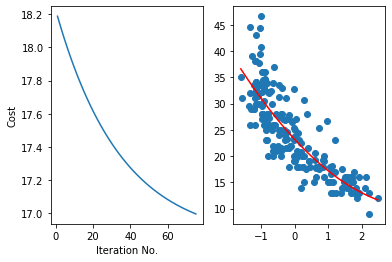

Error =  16.996537413485054 theta0 =  24.0885 theta1 =  -13.3647360823571 theta2 =  7.041581188628934 



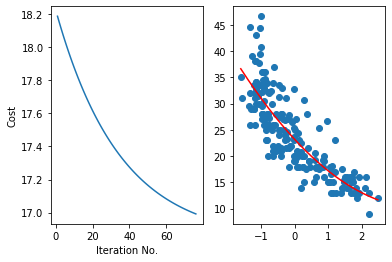

Error =  16.99200101102042 theta0 =  24.0885 theta1 =  -13.411848059330103 theta2 =  7.0883542139628135 



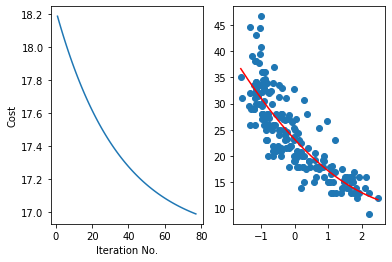

Error =  16.987593756747234 theta0 =  24.0885 theta1 =  -13.45828457164495 theta2 =  7.134456634333838 



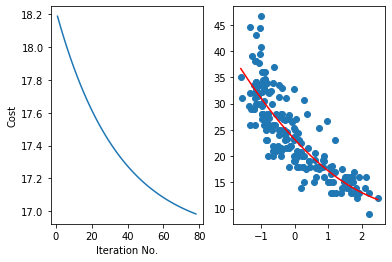

Error =  16.9833119739072 theta0 =  24.0885 theta1 =  -13.504055303728702 theta2 =  7.179898064493525 



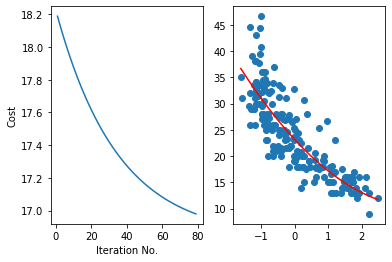

Error =  16.97915209041676 theta0 =  24.0885 theta1 =  -13.549169801158616 theta2 =  7.224687981342564 



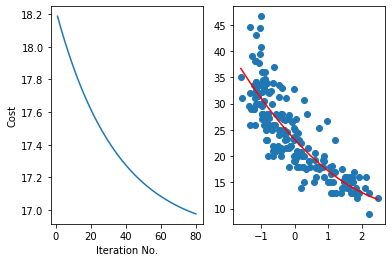

Error =  16.97511063588706 theta0 =  24.0885 theta1 =  -13.593637472652915 theta2 =  7.268835725907249 



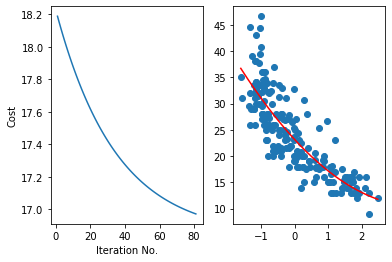

Error =  16.971184238728785 theta0 =  24.0885 theta1 =  -13.637467592032982 theta2 =  7.312350505287568 



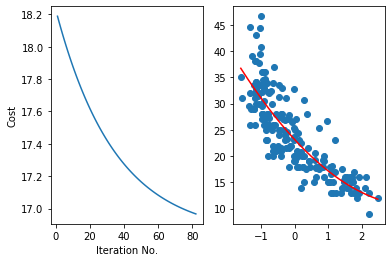

Error =  16.9673696233394 theta0 =  24.0885 theta1 =  -13.68066930015744 theta2 =  7.355241394577357 



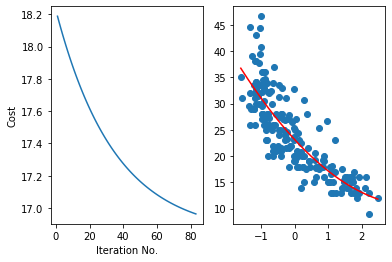

Error =  16.96366360737046 theta0 =  24.0885 theta1 =  -13.72325160682849 theta2 =  7.3975173387569315 



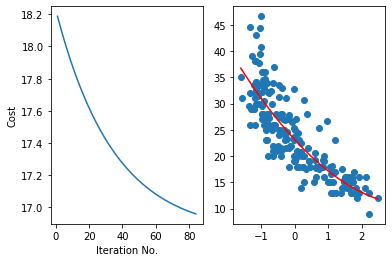

Error =  16.96006309907276 theta0 =  24.0885 theta1 =  -13.765223392670933 theta2 =  7.439187154558583 



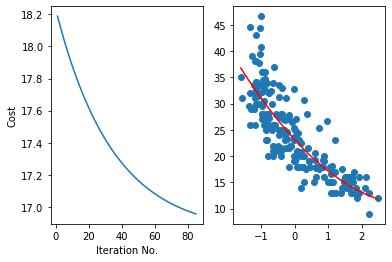

Error =  16.95656509471701 theta0 =  24.0885 theta1 =  -13.806593410984231 theta2 =  7.4802595323053245 



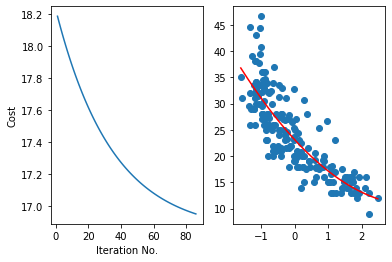

Error =  16.953166676087996 theta0 =  24.0885 theta1 =  -13.847370289568032 theta2 =  7.520743037723269 



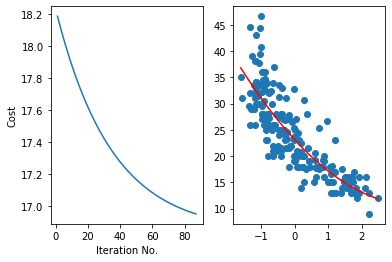

Error =  16.949865008050033 theta0 =  24.0885 theta1 =  -13.887562532521514 theta2 =  7.560646113728039 



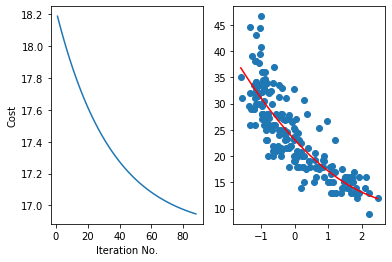

Error =  16.94665733618176 theta0 =  24.0885 theta1 =  -13.92717852201693 theta2 =  7.599977082185543 



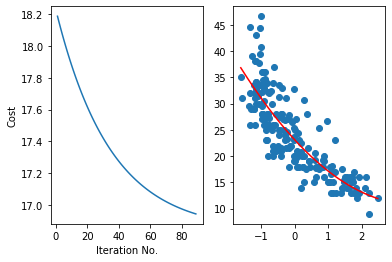

Error =  16.943540984478254 theta0 =  24.0885 theta1 =  -13.96622652004773 theta2 =  7.638744145647525 



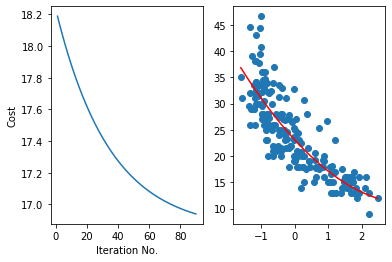

Error =  16.940513353118572 theta0 =  24.0885 theta1 =  -14.004714670151609 theta2 =  7.676955389062219 



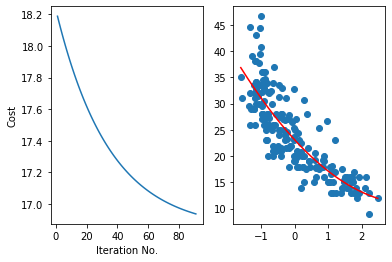

Error =  16.93757191629686 theta0 =  24.0885 theta1 =  -14.042650999108865 theta2 =  7.714618781460483 



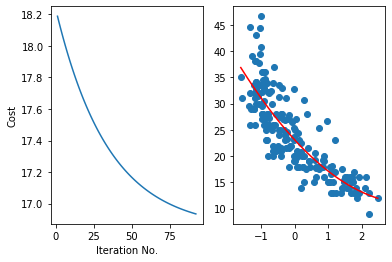

Error =  16.93471422011516 theta0 =  24.0885 theta1 =  -14.0800434186164 theta2 =  7.751742177617753 



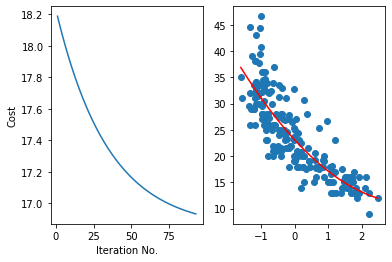

Error =  16.93193788053628 theta0 =  24.0885 theta1 =  -14.116899726937714 theta2 =  7.788333319692176 



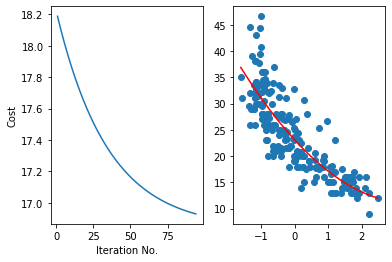

Error =  16.929240581394897 theta0 =  24.0885 theta1 =  -14.153227610529255 theta2 =  7.824399838839251 



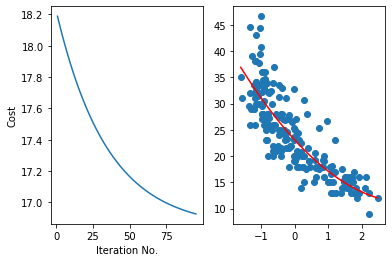

Error =  16.926620072465273 theta0 =  24.0885 theta1 =  -14.18903464564344 theta2 =  7.859949256803321 



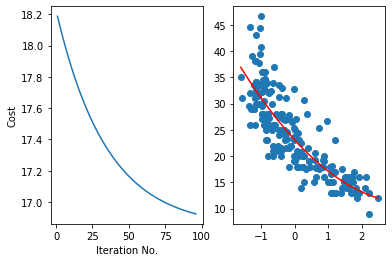

Error =  16.924074167584017 theta0 =  24.0885 theta1 =  -14.224328299908702 theta2 =  7.894988987486248 



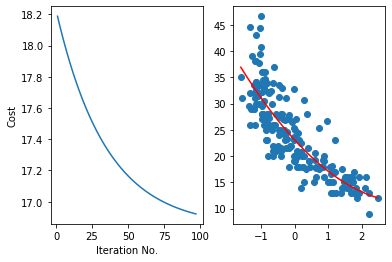

Error =  16.921600742826286 theta0 =  24.0885 theta1 =  -14.259115933886873 theta2 =  7.929526338493597 



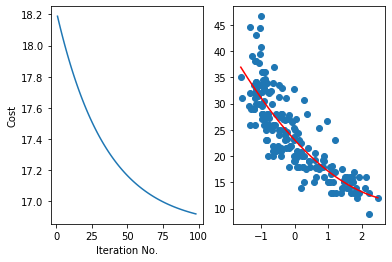

Error =  16.919197734733885 theta0 =  24.0885 theta1 =  -14.293404802608249 theta2 =  7.963568512658651 



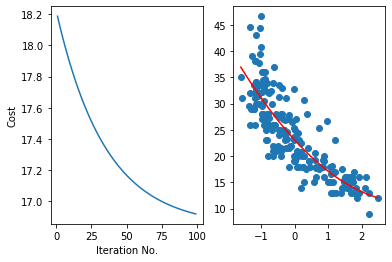

Error =  16.91686313859381 theta0 =  24.0885 theta1 =  -14.32720205708464 theta2 =  7.997122609544581 



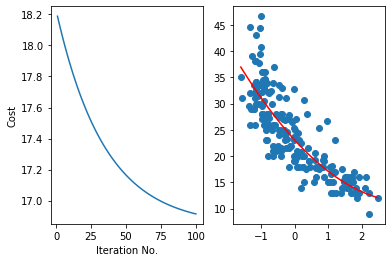

Error =  16.914595006765836 theta0 =  24.0885 theta1 =  -14.360514745800726 theta2 =  8.030195626925066 



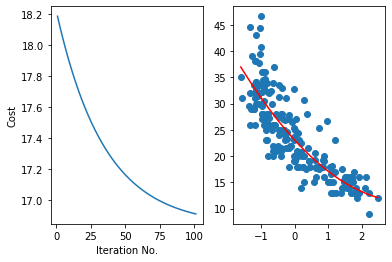

Error =  16.912391447057693 theta0 =  24.0885 theta1 =  -14.393349816184033 theta2 =  8.062794462243698 



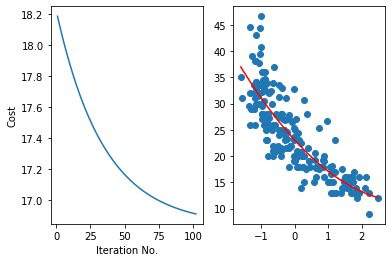

Error =  16.910250621146485 theta0 =  24.0885 theta1 =  -14.425714116053832 theta2 =  8.094925914052457 



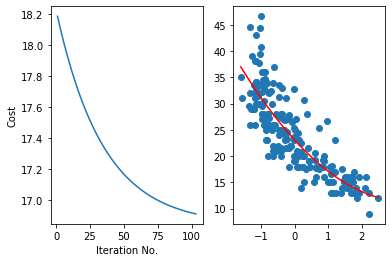

Error =  16.908170743045083 theta0 =  24.0885 theta1 =  -14.45761439504927 theta2 =  8.126596683429561 



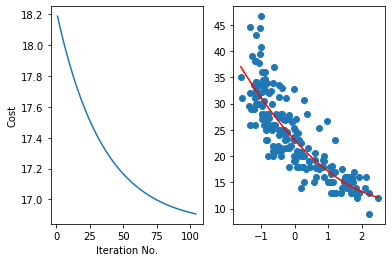

Error =  16.90615007761216 theta0 =  24.0885 theta1 =  -14.489057306037013 theta2 =  8.15781337537699 



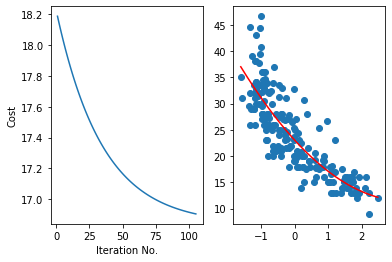

Error =  16.904186939104633 theta0 =  24.0885 theta1 =  -14.520049406498723 theta2 =  8.188582500197976 



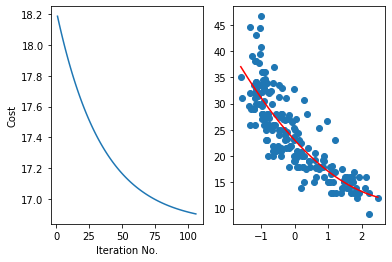

Error =  16.90227968977136 theta0 =  24.0885 theta1 =  -14.550597159898626 theta2 =  8.218910474854729 



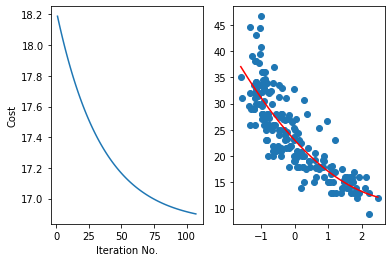

Error =  16.900426738486797 theta0 =  24.0885 theta1 =  -14.580706937031486 theta2 =  8.24880362430672 



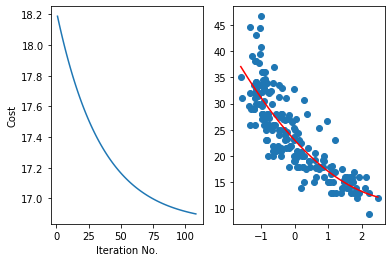

Error =  16.898626539423645 theta0 =  24.0885 theta1 =  -14.610385017351247 theta2 =  8.278268182829759 



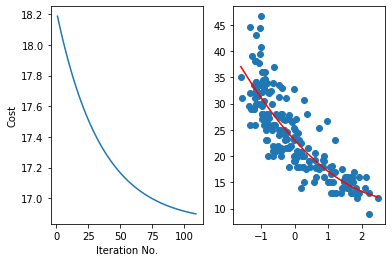

Error =  16.89687759076322 theta0 =  24.0885 theta1 =  -14.639637590280618 theta2 =  8.307310295316158 



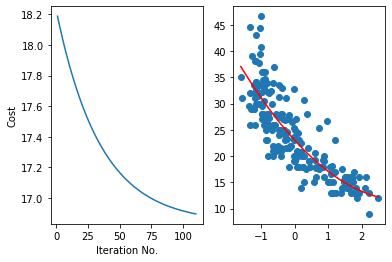

Error =  16.89517843344256 theta0 =  24.0885 theta1 =  -14.668470756501899 theta2 =  8.335936018556275 



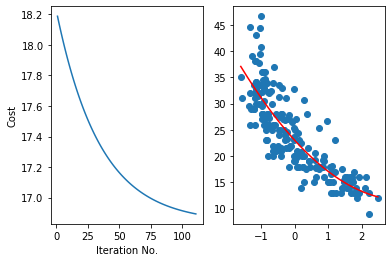

Error =  16.893527649937194 theta0 =  24.0885 theta1 =  -14.696890529229286 theta2 =  8.364151322501659 



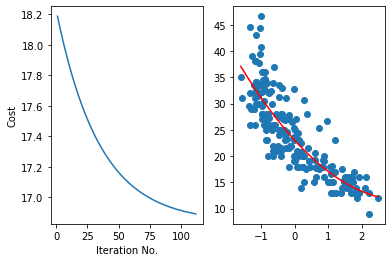

Error =  16.891923863078592 theta0 =  24.0885 theta1 =  -14.724902835462938 theta2 =  8.391962091510097 



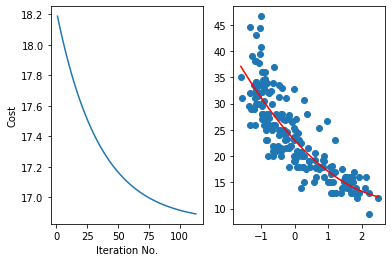

Error =  16.890365734905224 theta0 =  24.0885 theta1 =  -14.752513517225069 theta2 =  8.419374125572812 



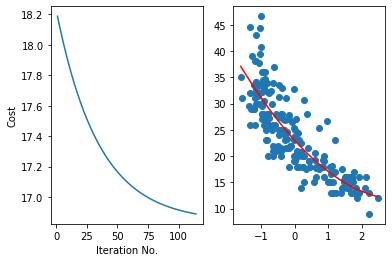

Error =  16.888851965546397 theta0 =  24.0885 theta1 =  -14.779728332778303 theta2 =  8.446393141524059 



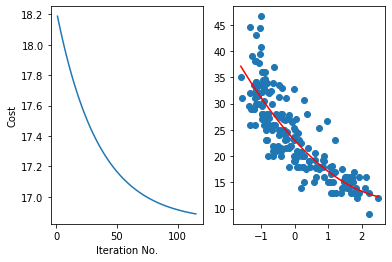

Error =  16.887381292137825 theta0 =  24.0885 theta1 =  -14.806552957826586 theta2 =  8.473024774233382 



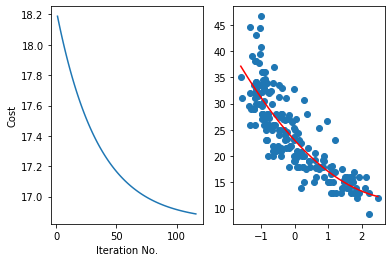

Error =  16.885952487768083 theta0 =  24.0885 theta1 =  -14.832992986698853 theta2 =  8.499274577780785 



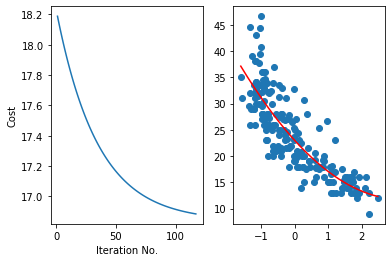

Error =  16.88456436045504 theta0 =  24.0885 theta1 =  -14.859053933515744 theta2 =  8.525148026615033 



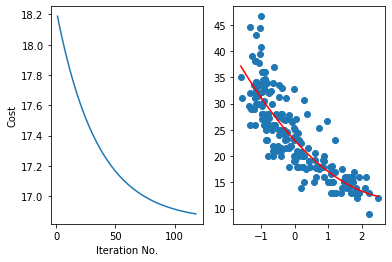

Error =  16.883215752151465 theta0 =  24.0885 theta1 =  -14.884741233339579 theta2 =  8.550650516695374 



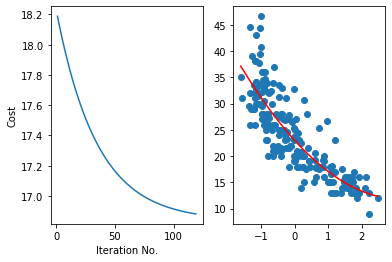

Error =  16.881905537778927 theta0 =  24.0885 theta1 =  -14.910060243307859 theta2 =  8.575787366616863 



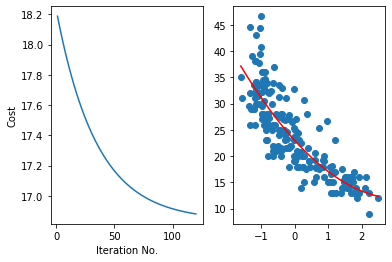

Error =  16.88063262428918 theta0 =  24.0885 theta1 =  -14.935016243750495 theta2 =  8.600563818719577 



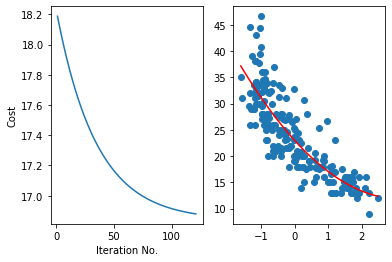

Error =  16.87939594975229 theta0 =  24.0885 theta1 =  -14.959614439291046 theta2 =  8.624985040181908 



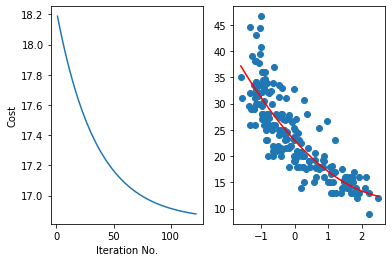

Error =  16.878194482470725 theta0 =  24.0885 theta1 =  -14.983859959932145 theta2 =  8.649056124098193 



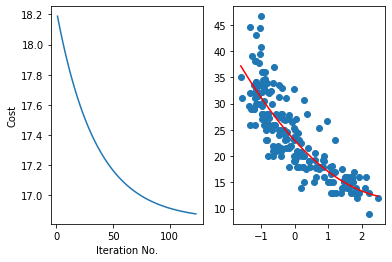

Error =  16.877027220118663 theta0 =  24.0885 theta1 =  -15.007757862125372 theta2 =  8.672782090540885 



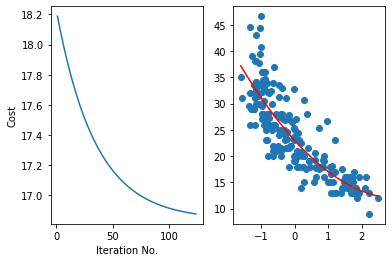

Error =  16.875893188905785 theta0 =  24.0885 theta1 =  -15.031313129825785 theta2 =  8.696167887607501 



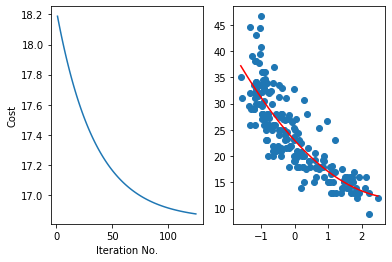

Error =  16.874791442764906 theta0 =  24.0885 theta1 =  -15.05453067553134 theta2 =  8.719218392452559 



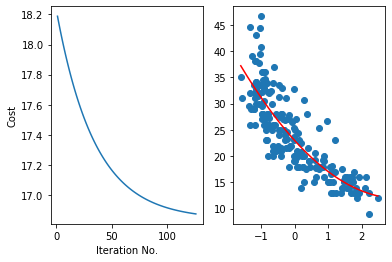

Error =  16.873721062562705 theta0 =  24.0885 theta1 =  -15.077415341307402 theta2 =  8.741938412304718 



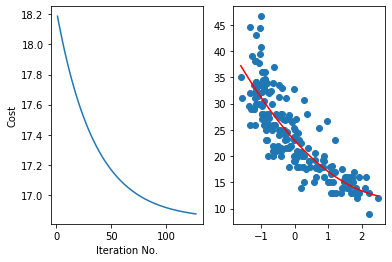

Error =  16.87268115533294 theta0 =  24.0885 theta1 =  -15.099971899796557 theta2 =  8.764332685469332 



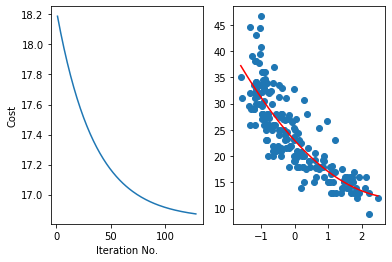

Error =  16.871670853531494 theta0 =  24.0885 theta1 =  -15.12220505521397 theta2 =  8.786405882316634 



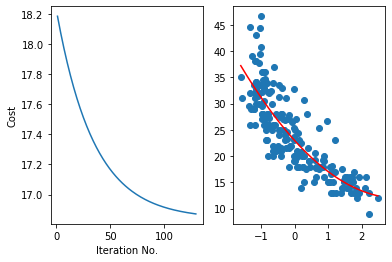

Error =  16.87068931431262 theta0 =  24.0885 theta1 =  -15.144119444328444 theta2 =  8.808162606255754 



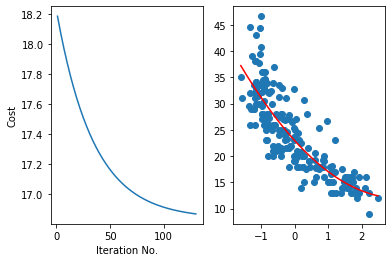

Error =  16.869735718825797 theta0 =  24.0885 theta1 =  -15.165719637429444 theta2 =  8.829607394694769 



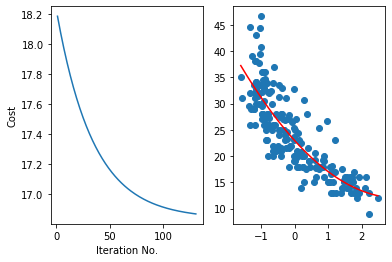

Error =  16.8688092715326 theta0 =  24.0885 theta1 =  -15.187010139280225 theta2 =  8.850744719986983 



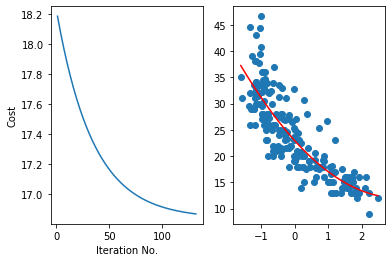

Error =  16.86790919954304 theta0 =  24.0885 theta1 =  -15.20799539005732 theta2 =  8.87157899036365 



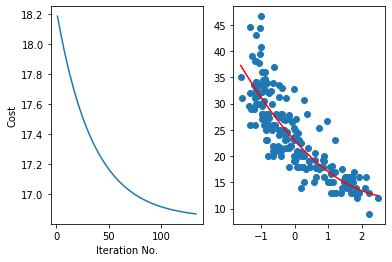

Error =  16.86703475197073 theta0 =  24.0885 theta1 =  -15.228679766276539 theta2 =  8.892114550853318 



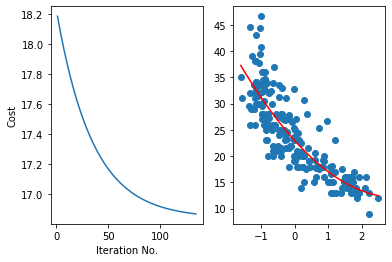

Error =  16.866185199306525 theta0 =  24.0885 theta1 =  -15.249067581705704 theta2 =  8.912355684187997 



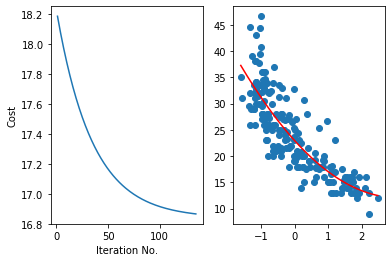

Error =  16.865359832809883 theta0 =  24.0885 theta1 =  -15.2691630882643 theta2 =  8.932306611696324 



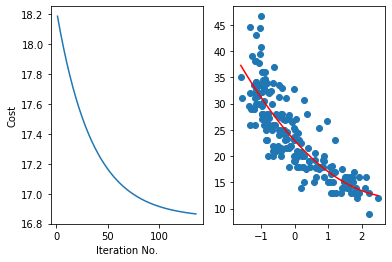

Error =  16.86455796391759 theta0 =  24.0885 theta1 =  -15.288970476910208 theta2 =  8.951971494183933 



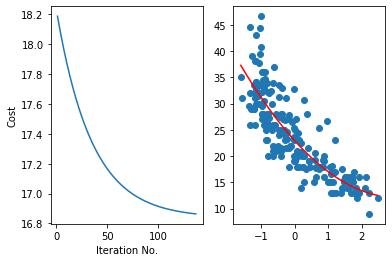

Error =  16.86377892366937 theta0 =  24.088500000000003 theta1 =  -15.30849387851375 theta2 =  8.971354432801203 



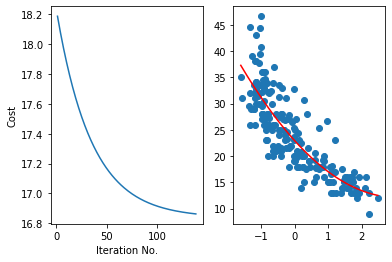

Error =  16.863022062149753 theta0 =  24.0885 theta1 =  -15.32773736471918 theta2 =  8.990459469898553 



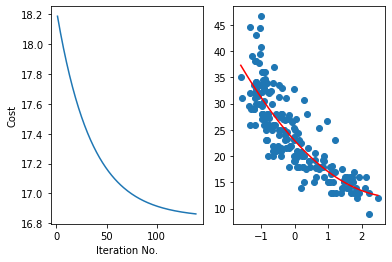

Error =  16.862286747945927 theta0 =  24.0885 theta1 =  -15.346704948793844 theta2 =  9.009290589869494 



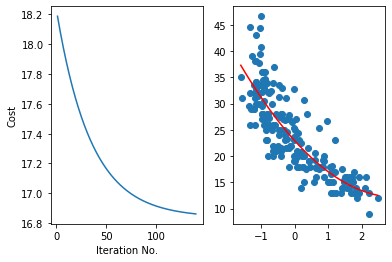

Error =  16.861572367620937 theta0 =  24.0885 theta1 =  -15.36540058646515 theta2 =  9.027851719981568 



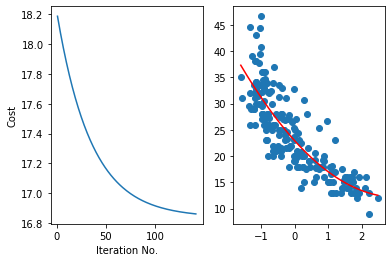

Error =  16.860878325201963 theta0 =  24.0885 theta1 =  -15.383828176745537 theta2 =  9.046146731195401 



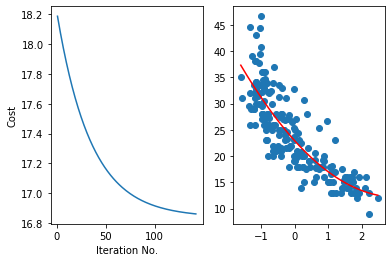

Error =  16.860204041683108 theta0 =  24.0885 theta1 =  -15.40199156274563 theta2 =  9.064179438971987 



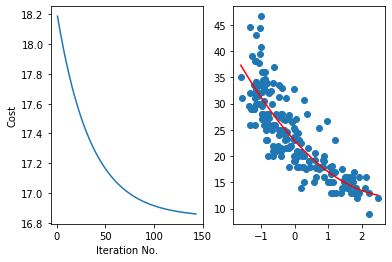

Error =  16.859548954542362 theta0 =  24.0885 theta1 =  -15.419894532475727 theta2 =  9.08195360406842 



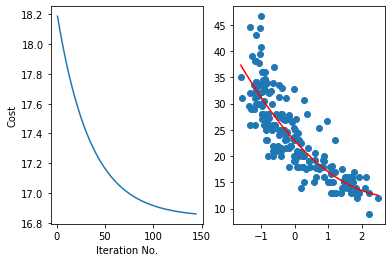

Error =  16.85891251727233 theta0 =  24.0885 theta1 =  -15.437540819635794 theta2 =  9.099472933322204 



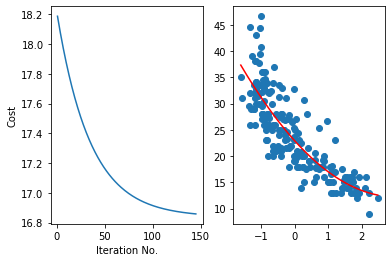

Error =  16.85829419892429 theta0 =  24.0885 theta1 =  -15.454934104394134 theta2 =  9.116741080424317 



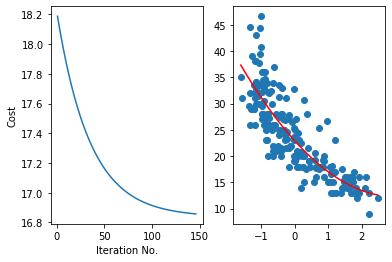

Error =  16.857693483665273 theta0 =  24.0885 theta1 =  -15.472078014154897 theta2 =  9.133761646681204 



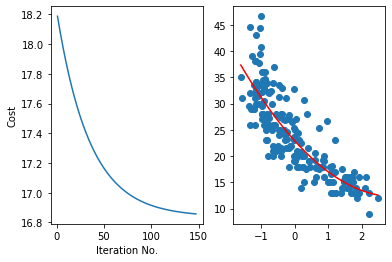

Error =  16.857109870347678 theta0 =  24.0885 theta1 =  -15.488976124314583 theta2 =  9.15053818176583 



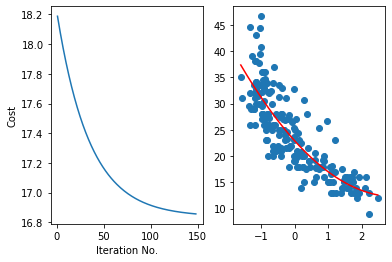

Error =  16.856542872091264 theta0 =  24.0885 theta1 =  -15.505631959007692 theta2 =  9.167074184457972 



In [0]:
#cost function computation and updating weights
iteration_Nos = range(1, 150)
err_F = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X2));

    plt.clf()
    plt.subplot(1,2,1);
    plt.plot(range(1, i), err_F[1:i])
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')
    
    plt.subplot(1,2,2);
    plt.scatter(X1, Y)
    X_R = np.arange(np.min(train_setx['weight']),np.max(train_setx['weight']), 0.1);
    # create a x axis with  min to max
    X_R2 = np.square(X_R);
    X_R = (X_R-M1)/S1;
    X_R2 = (X_R2 - M2)/S2;
    plt.plot(X_R, theta0 + theta1*X_R+ theta2*X_R2, 'r');
    plt.show()
    #ploting the red line
    print('Error = ',h, 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2,'\n')

#Assignment 4.1 (2):
Write a code to perform linear regression using these four variables: Weight, Weight^2, Displacement, Displacement^2
Plot the square root of cost function for training and test data for 500 iterations. You should be able to reach an error of about 4 mpg.

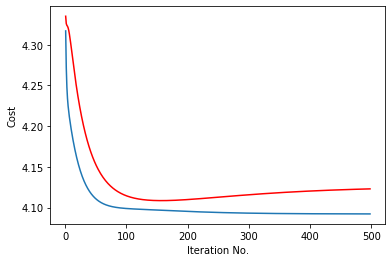


Can you improve the error performance even more?

Error =  3.9786181875466484 theta0 =  24.0885 theta1 =  -9.947519815368281 theta2 =  6.367048251124903 theta3 =  -7.394445706526227 theta4 =  4.602961087927333 



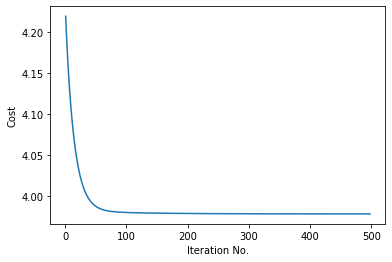

In [0]:
#Create the test set
#copy alls rows after 200. Extract the mpg row as the target (test_sety)
test_Set = cars[200:]
test_sety = test_Set['mpg'];
test_setx = test_Set.drop(columns = ['mpg'])

#initialization
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);
theta3 = random.uniform(-1,1);
theta4 = random.uniform(-1,1);

#normalization
import numpy as np
X1 = train_setx['weight'];
X2 = np.square(train_setx['weight'])
X3 = train_setx['displacement'];
X4 = np.square(train_setx['displacement'])

M1= np.mean(X1);
S1 = np.std(X1);
X1 = (X1 - M1)/S1;

M2= np.mean(X2);
S2 = np.std(X2);
X2 = (X2 - M2)/S2;

M3= np.mean(X3);
S3 = np.std(X3);
X3 = (X3 - M3)/S3;

M4= np.mean(X4);
S4 = np.std(X4);
X4 = (X4 - M4)/S4;

Y = train_sety
L = len(X1)
alpha = 0.5;

#compututing cost functio and updating weights
iteration_Nos = range(1, 500)
err_F = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X2));
    theta3 = theta3 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X3));
    theta4 = theta4 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X4));

    plt.clf()
    plt.plot(range(1, i), np.sqrt(err_F[1:i]))
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')


    #ploting the red line
print('Error = ',np.sqrt(h), 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4,'\n')

In [0]:
#Testing set using theta from training set

#normalization of test set
x1 = test_setx['weight'];
x2 = np.square(test_setx['weight'])
x3 = test_setx['displacement'];
x4 = np.square(test_setx['displacement'])

m1= np.mean(x1);
s1 = np.std(x1);
x1 = (x1 - m1)/s1;

m2= np.mean(x2);
s2 = np.std(x2);
x2 = (x2 - m2)/s2;

m3= np.mean(x3);
s3 = np.std(x3);
x3 = (x3 - m3)/s3;

m4= np.mean(x4);
s4 = np.std(x4);
x4 = (x4 - m4)/s4;

y = test_sety
l = len(x1)
#testing set error
h3 = ((1/l)*np.sum(np.square(theta0 + theta1*x1 + theta2*x2 + theta3*x3 + theta4*x4 - y)))
print('Testing set error using trained theta vector= ',np.sqrt(h3),'\n', 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4, '\n')

Testing set error using trained theta vector=  4.371935404874587 
 theta0 =  24.0885 theta1 =  -9.947519815368281 theta2 =  6.367048251124903 theta3 =  -7.394445706526227 theta4 =  4.602961087927333 



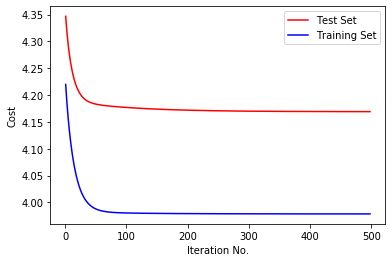

Training Set:  Error =  3.9786181875466484 theta0 =  24.0885 theta1 =  -9.947519815368281 theta2 =  6.367048251124903 theta3 =  -7.394445706526227 theta4 =  4.602961087927333 

Testing Set:  Error =  4.169154751021757 theta0 =  22.934848484848487 theta1 =  -12.765613676610267 theta2 =  8.03887611104181 theta3 =  -2.639704920256402 theta4 =  0.8336169747134355 



In [0]:
#Training set vs testing set
th0 = random.uniform(-1,1);
th1 = random.uniform(-1,1);
th2 = random.uniform(-1,1);
th3 = random.uniform(-1,1);
th4 = random.uniform(-1,1);

iteration_Nos = range(1, 500)
err_F2 = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h2 = ((1/l)*np.sum(np.square(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y)))
    err_F2[i-1] = h2;
    th0 = th0 - (alpha/l)*np.sum((2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y)));
    th1 = th1 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x1));
    th2 = th2 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x2));
    th3 = th3 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x3));
    th4 = th4 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x4));

plt.plot(range(1, i), np.sqrt(err_F2[1:i]),'r',label='Test Set')
plt.plot(range(1, i), np.sqrt(err_F[1:i]),'b',label='Training Set')
plt.legend(loc="upper right")
plt.xlabel('Iteration No.')
plt.ylabel('Cost')
plt.show()

 #ploting the red line
print('Training Set: ','Error = ',np.sqrt(h), 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4, '\n')
print('Testing Set: ','Error = ',np.sqrt(h2), 'theta0 = ', th0, 'theta1 = ', th1, 'theta2 = ', th2, 'theta3 = ', th3, 'theta4 = ', th4, '\n')

We can improve the perfomance even further by adding more parameters like -cylinders and cylinders square, since the correlation of mpg with cylinders is strong



#Assignment 4.2 (0.5):
Here is a code for using SKLearn libraries to implement linear regression without hand coding everything. Comment all lines as per your understanding.


#Assignment 4.3 (0.5):
Get the predicted mpg for the fourth row of the test set. How does it compare with the actual mpg?

In [0]:
x_Train = pd.DataFrame()
x_Train['weight'] = train_Set['weight']
x_Train['displacement'] = train_Set['displacement']
x_Train['weight_sqr'] = np.square(train_Set['weight'])
x_Train['displacement_Sqr'] = np.square(train_Set['displacement'])

x_Test = pd.DataFrame()
x_Test['weight'] = test_Set['weight']
x_Test['displacement'] = test_Set['displacement']
x_Test['weight_sqr'] = np.square(test_Set['weight'])
x_Test['displacement_Sqr'] = np.square(test_Set['displacement'])

In [0]:
from sklearn.linear_model import LinearRegression  #import LinearRegression module
from sklearn.metrics import mean_squared_error, r2_score  #import mean squared error

lin_model = LinearRegression()
lin_model.fit(x_Train, train_sety)  #apply linear regression on x_train dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_train_predict = lin_model.predict(x_Train)
rmse = (np.sqrt(mean_squared_error(train_sety, y_train_predict)))
r2 = r2_score(train_sety, y_train_predict)    #use r2_score function on train_sety and y_train_predict


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


y_test_predict = lin_model.predict(x_Test)    #perform above steps for test set
rmse = (np.sqrt(mean_squared_error(test_sety, y_test_predict)))
r2 = r2_score(test_sety, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

predict=theta0+theta1*x1+theta2*x2+theta3*x3+theta4*x4
predict=predict.reset_index(drop=True)
actual=y.reset_index(drop=True)
print('Predicted mpg: ',predict[4])
print('Actual mpg: ',actual[4])

The model performance for training set
--------------------------------------
RMSE is 3.9785975291983506
R2 score is 0.7343540095669594


The model performance for testing set
--------------------------------------
RMSE is 4.2602525764059305
R2 score is 0.7055014433151507
Predicted mpg:  31.51453349265451
Actual mpg:  44.0


#Assignment 4.4 (1 M)
Find the theta vector for linear regression using these four variables: Weight, Weight^2, Displacement, Displacement^2 using normal equation method. Compare it with results obtained in 4.1 

In [0]:
#Normal equation for training set
I=np.ones([len(Y)])
X=np.array([I,X1,X2,X3,X4])
XT=np.transpose(X)
ntheta=np.dot(np.dot(np.linalg.inv(np.dot(X,XT)),X),Y)
print('Original theta: ','\n','[ ',  theta0,' ', theta1,' ', theta2,' ', theta3,' ', theta4,' ]', '\n','\n')
print('Normal Equation theta: ',ntheta)

#Normal equation for testing set

i=np.ones([len(y)])
x=np.array([i,x1,x2,x3,x4])
xt=np.transpose(x)
ntheta2=np.dot(np.dot(np.linalg.inv(np.dot(x,xt)),x),y)
print('Original theta: ','\n','[ ',  th0,' ', th1,' ', th2,' ', th3,' ', th4,' ]', '\n','\n')
print('Normal Equation theta: ',ntheta2)

Original theta:  
 [  24.0885   -9.947519815368281   6.367048251124903   -7.394445706526227   4.602961087927333  ] 
 

Normal Equation theta:  [ 24.0885     -10.10042285   6.4982489   -7.29068241   4.51842657]
Original theta:  
 [  22.934848484848487   -12.765613676610267   8.03887611104181   -2.639704920256402   0.8336169747134355  ] 
 

Normal Equation theta:  [ 22.93484848 -13.16356873   8.39535126  -2.36596804   0.59784253]
